In [2]:
import pandas as pd
import numpy as np

In [3]:
test_path = 'dataset/fraudTest.csv'
train_path = 'dataset/fraudTrain.csv'
df_train = pd.read_csv(train_path, dtype_backend = "pyarrow")

Time - Number of seconds elapsed between this transaction and the first transaction in the dataset -> dataset is from earliest to latest dataset

In [4]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Using df_train.describe() will cause an error because 4992346398065154184 is present in the Credit Card Number column. We can convert to string to fix this 

In [5]:
df_train["cc_num"] = df_train["cc_num"].astype(str)

### What does this table represent

This is a tabular representation of customer transactions and our objective is to achieve fraud detection classification accuracy using deep learning techniques.

### Explaining each individual features

Col 1 - Index
trans_date_trans_time -> Transaction DateTime
cc_num -> credit card number
Merchant -> Merchant name
Category -> type of industry where credit card transaction took place
amt -> amount of transaction
First -> first name
Last -> lat name
gender, Street, City, State, Zip, lat, long
city_pop -> credit card holder city population
job, dob, trans_num
unix_time -> UNIX time of transaction (standard way of representing time in computing systems)
merch_lat, merch_long
is_fraud -> fraud flag

### Examine individual features

In [6]:
df_train.describe(include = "all")

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1296675.0,1296675,1296675,1296675,1296675,1296675.0,1296675,1296675,1296675,1296675,...,1296675.0,1296675.0,1296675.0,1296675,1296675,1296675,1296675.0,1296675.0,1296675.0,1296675.0
unique,<NA>,1274791,983,693,14,<NA>,352,481,2,983,...,<NA>,<NA>,<NA>,494,968,1296675,<NA>,<NA>,<NA>,<NA>
top,<NA>,2019-04-22 16:02:01,571365235126,fraud_Kilback LLC,gas_transport,<NA>,Christopher,Smith,F,864 Reynolds Plains,...,<NA>,<NA>,<NA>,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,<NA>,<NA>,<NA>,<NA>
freq,<NA>,4,3123,4403,131659,<NA>,26669,28794,709863,3123,...,<NA>,<NA>,<NA>,9779,5636,1,<NA>,<NA>,<NA>,<NA>
mean,648337.0,NaN,NaN,NaN,NaN,70.351035,NaN,NaN,NaN,NaN,...,38.537622,-90.226335,88824.440563,NaN,NaN,NaN,1349243636.726123,38.537338,-90.226465,0.005789
std,374317.974488,NaN,NaN,NaN,NaN,160.316039,NaN,NaN,NaN,NaN,...,5.075808,13.759077,301956.360689,NaN,NaN,NaN,12841278.423359,5.109788,13.771091,0.075863
min,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,20.0271,-165.6723,23.0,NaN,NaN,NaN,1325376018.0,19.027785,-166.671242,0.0
25%,324168.5,NaN,NaN,NaN,NaN,9.65,NaN,NaN,NaN,NaN,...,34.6205,-96.798,743.0,NaN,NaN,NaN,1338750742.5,34.733572,-96.897276,0.0
50%,648337.0,NaN,NaN,NaN,NaN,47.52,NaN,NaN,NaN,NaN,...,39.3543,-87.4769,2456.0,NaN,NaN,NaN,1349249747.0,39.36568,-87.438392,0.0
75%,972505.5,NaN,NaN,NaN,NaN,83.14,NaN,NaN,NaN,NaN,...,41.9404,-80.158,20328.0,NaN,NaN,NaN,1359385375.5,41.957164,-80.236796,0.0


In [7]:
1296675 - 709863

586812

Transaction Date

In [8]:
pd.to_datetime(df_train["trans_date_trans_time"]).describe()

count                          1296675
mean     2019-10-03 12:47:28.070214144
min                2019-01-01 00:00:18
25%         2019-06-03 19:12:22.500000
50%                2019-10-03 07:35:47
75%         2020-01-28 15:02:55.500000
max                2020-06-21 12:13:37
Name: trans_date_trans_time, dtype: object

We can conclude that the transaction occur uniformily throughout the year starting from 1/1/2019 to 21/6/2020 - no present skew in transaction quantity

amt - Amount - Clear outliers of larger transactions beyond $100, on average we would expect someone to spend $70

gender - 709863 Females and 586812 Males in dataset

is_fraud -> 7506 cases of fraud

In [9]:
df_train.query("is_fraud == 1").count()

C:\Users\User\AppData\Local\Temp\ipykernel_27604\3410903811.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_train.query("is_fraud == 1").count()


Unnamed: 0               7506
trans_date_trans_time    7506
cc_num                   7506
merchant                 7506
category                 7506
amt                      7506
first                    7506
last                     7506
gender                   7506
street                   7506
city                     7506
state                    7506
zip                      7506
lat                      7506
long                     7506
city_pop                 7506
job                      7506
dob                      7506
trans_num                7506
unix_time                7506
merch_lat                7506
merch_long               7506
is_fraud                 7506
dtype: int64

filter by fraud tag then implement operations

In [10]:
fraud_df = df_train.query("is_fraud == 1")

C:\Users\User\AppData\Local\Temp\ipykernel_27604\1457913298.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  fraud_df = df_train.query("is_fraud == 1")


In [11]:
fraud_df.describe(include = "all")

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,7506.0,7506,7506,7506,7506,7506.0,7506,7506,7506,7506,...,7506.0,7506.0,7506.0,7506,7506,7506,7506.0,7506.0,7506.0,7506.0
unique,<NA>,7501,762,679,14,<NA>,313,423,2,762,...,<NA>,<NA>,<NA>,443,753,7506,<NA>,<NA>,<NA>,<NA>
top,<NA>,2019-02-07 22:17:53,4593569795412,fraud_Rau and Sons,grocery_pos,<NA>,Christopher,Johnson,M,15315 Vaughn Park Suite 356,...,<NA>,<NA>,<NA>,Materials engineer,1942-01-06,e8a81877ae9a0a7f883e15cb39dc4022,<NA>,<NA>,<NA>,<NA>
freq,<NA>,2,19,49,1743,<NA>,163,158,3771,19,...,<NA>,<NA>,<NA>,62,23,1,<NA>,<NA>,<NA>,<NA>
mean,624949.724354,NaN,NaN,NaN,NaN,531.320092,NaN,NaN,NaN,NaN,...,38.663609,-89.916041,97276.763256,NaN,NaN,NaN,1348389120.965627,38.653901,-89.915808,1.0
std,401056.008919,NaN,NaN,NaN,NaN,390.56007,NaN,NaN,NaN,NaN,...,5.172289,14.278221,326581.46667,NaN,NaN,NaN,13830201.29225,5.218387,14.298685,0.0
min,2449.0,NaN,NaN,NaN,NaN,1.06,NaN,NaN,NaN,NaN,...,20.0271,-165.6723,23.0,NaN,NaN,NaN,1325466397.0,19.425114,-166.550779,1.0
25%,239856.5,NaN,NaN,NaN,NaN,245.6625,NaN,NaN,NaN,NaN,...,35.0561,-96.701,746.5,NaN,NaN,NaN,1335743544.75,35.114671,-96.671038,1.0
50%,638162.0,NaN,NaN,NaN,NaN,396.505,NaN,NaN,NaN,NaN,...,39.4336,-86.6919,2623.0,NaN,NaN,NaN,1348872455.5,39.427008,-86.813044,1.0
75%,984921.5,NaN,NaN,NaN,NaN,900.875,NaN,NaN,NaN,NaN,...,42.073175,-79.9416,21437.0,NaN,NaN,NaN,1360021288.0,41.986902,-79.907096,1.0


In [12]:
pd.to_datetime(fraud_df["trans_date_trans_time"]).describe()

count                             7506
mean     2019-09-23 16:52:32.620303872
min                2019-01-02 01:06:37
25%      2019-04-29 23:52:24.750000128
50%         2019-09-28 22:47:35.500000
75%                2020-02-04 23:41:28
max                2020-06-21 03:59:46
Name: trans_date_trans_time, dtype: object

Frauds seem to occur uniformily throughout the year.

The amount of an fraudulent claim on average is above the average spend of a customer transaction. And it is significantly below the maximum transaction in the DB.

Slightly more males succumbing to fraud than females

In [13]:
fraud_df["job"].value_counts()

job
Materials engineer                      62
Trading standards officer               56
Naval architect                         53
Exhibition designer                     51
Surveyor, land/geomatics                50
                                        ..
Health physicist                         3
Chartered loss adjuster                  3
Statistician                             3
English as a second language teacher     2
Contractor                               2
Name: count, Length: 443, dtype: int64[pyarrow]

Materials engineer occupation succumbs to greatest number of fraudulent transactions

# Data Cleaning

In [ ]:
#no duplicates
duplicates = df_train.duplicated()
print(df_train[duplicates])

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 23 columns]


In [ ]:
#no null transactions
print(df_train.isnull().sum())

Identifying outliers and performing boxcox transform to minimize skew and noting we are working with all positive data (nature of boxcox is piecewise function)

In [69]:
from scipy import stats

In [ ]:
z = np.abs(stats.zscore(df_train["amt"]))
threshold = 3
outliers = df_train[z > threshold]
outliers

This means 12000 rows have values more than 3 standard deviations away from the mean and we can justify a log transform to make the results more reasonable

In [71]:
df_train["amt_boxcox"], fitted_lambda = stats.boxcox(df_train["amt"])

In [ ]:
z = np.abs(stats.zscore(df_train["city_pop"]))
threshold = 3
outliers = df_train[z > threshold]
outliers

In [74]:
df_train["city_pop_boxcox"], fitted_lambda = stats.boxcox(df_train["amt"])

# Removing Irrelevant data

Col 1 - Index
trans_date_trans_time -> Transaction DateTime
cc_num -> credit card number
Merchant -> Merchant name
Category -> type of industry where credit card transaction took place
amt -> amount of transaction
First -> first name
Last -> lat name
gender, Street, City, State, Zip, lat, long
city_pop -> credit card holder city population
job, dob, trans_num
unix_time -> UNIX time of transaction (standard way of representing time in computing systems)
merch_lat, merch_long
is_fraud -> fraud flag

In [83]:
df_train.columns.tolist()

['Unnamed: 0',
 'trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'amt_boxcox',
 'city_pop_boxcox']

In [85]:
df_train_new = df_train[["trans_date_trans_time", "cc_num", "merchant", "category", "amt_boxcox",
                          "gender", "street", "city", "state", "zip", "lat", "long", "city_pop_boxcox", "job", "dob", "unix_time", "merch_lat", "merch_long", "is_fraud"]]

# Plotting

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #Interactive scatter and heat-like mapbox plots
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from sklearn.preprocessing import MinMaxScaler

First we will plot the number of fraudulent claims for each job type

In [17]:
job_counts = fraud_df["job"].value_counts()

In [ ]:
# Plot the top 20 job types
job_counts.head(10).plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title("Top 10 Job Types")
plt.xlabel("Count")
plt.ylabel("Job")
plt.gca().invert_yaxis()  # Puts highest count on top
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(fraud_df['amt']), bins=50, kde=True, color='skyblue')
plt.title("Histogram of Fraudulent Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

In [35]:
#excluding fraudulent claims
not_fraud_df = df_train.query("is_fraud == 0")

C:\Users\User\AppData\Local\Temp\ipykernel_27604\2245793320.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  not_fraud_df = df_train.query("is_fraud == 0")


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(not_fraud_df["amt"]), bins=50, kde=True, color='skyblue')
plt.title("Histogram of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

Fraudulent transaction amounts come in 3 ranges of common claims. Interesting where the frequency dips is where fraudulent claims seem to occur.

Heatmap

In [ ]:
# Drop rows with missing lat/long
heat_data = fraud_df[['lat', 'long']].dropna().values.tolist()

# Center map on average coordinates
m = folium.Map(location=[fraud_df['lat'].mean(), fraud_df['long'].mean()], zoom_start=6)

# Add heatmap layer
HeatMap(heat_data, radius=8).add_to(m)



Interactive heatmap from longitude and latitude values, we can determine which states are subject to the greatest number of fraudulent claims (NY). 

In [ ]:

m = folium.Map(location=[fraud_df['lat'].mean(), fraud_df['long'].mean()], zoom_start=6)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in fraud_df.dropna(subset=['lat', 'long', 'amt']).iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"Amount: ${row['amt']:.2f}",
        tooltip="Click for details"
    ).add_to(marker_cluster)

m

Figure representing the population density of the persons considered -> higher population density correlates to greater number of fraud

In [ ]:
heat_data = fraud_df[['lat', 'long']].dropna()
heat_data['weight'] = fraud_df[['city_pop']]
heat_data_list = heat_data[['lat', 'long', 'weight']].values.tolist()
# Create base map centered on average location
m = folium.Map(location=[heat_data['lat'].mean(), heat_data['long'].mean()], zoom_start=6)

# Add heatmap layer with city population as weight
HeatMap(heat_data_list, radius=10, max_zoom=13).add_to(m)

# Display or save
m.save("population_heatmap.html")
m

Figure representing number of claims in any given location along with the amount of each claim

In [ ]:
m = folium.Map(location=[fraud_df['lat'].mean(), fraud_df['long'].mean()], zoom_start=6)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in fraud_df.dropna(subset=['lat', 'long', 'city_pop']).iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"Amount: ${row['city_pop']:.2f}",
        tooltip="Click for details"
    ).add_to(marker_cluster)

m

# Correlations

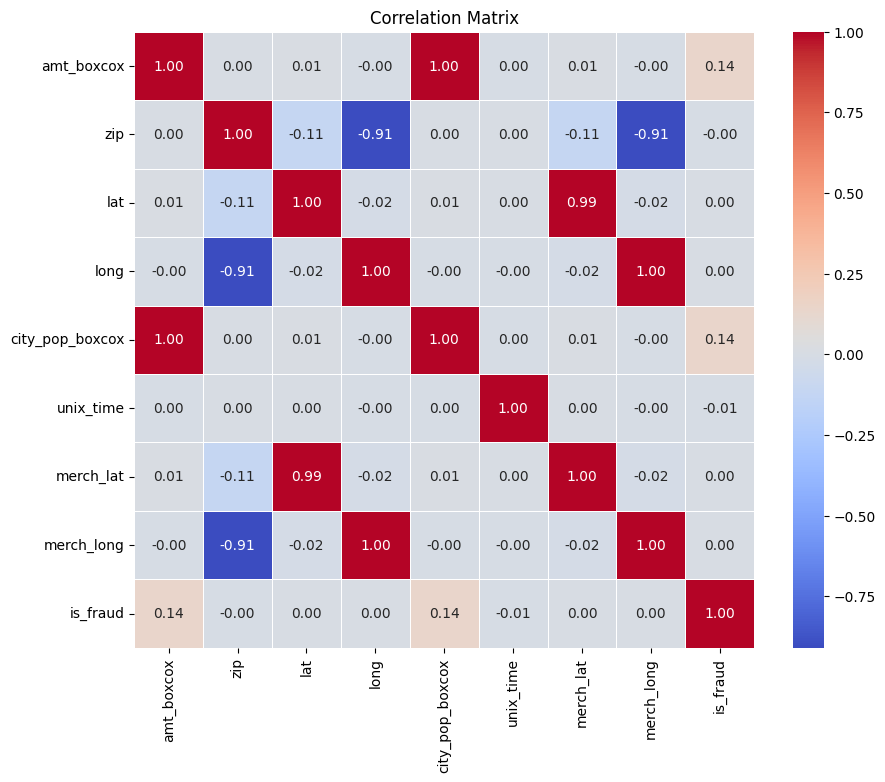

In [ ]:
cor_mat = df_train_new.corr(numeric_only = True)
plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Problem - using boxcox has caused the amt_boxcox feature to become correlated with city_pop_boxcox

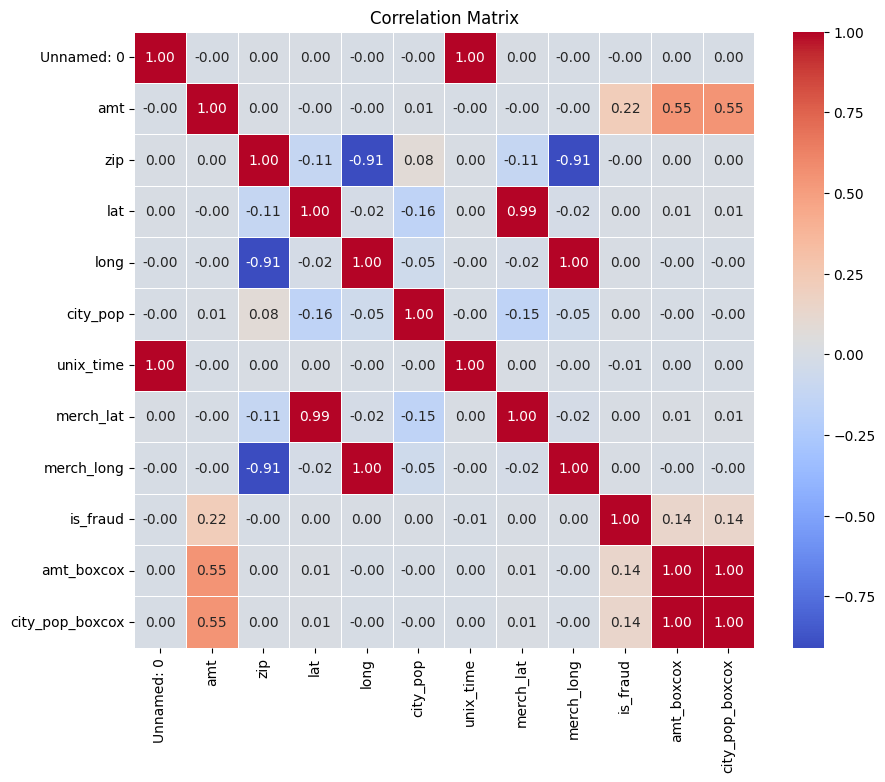

In [91]:
cor_mat = df_train.corr(numeric_only = True)
plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()